In [ ]:
# 드라이브 연동

# 경로 이동
# cd 명령어 활용하여 빅데이터 폴더까지 이동해보기
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데

/content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데


### 목표
 - 폐암환자의 생존을 예측하는 분류 모델을 만들어보자
   (0:사망, 1: 생존)
 - 다층퍼셉트론(신경망)을 활용하여 이진분류 문제를 해결해보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 불러오기
# header : 데이터 불러오면서 컬럼명 설정하는 키워도 None(숫자인덱스)
data = pd.read_csv('data/ThoraricSurgery.csv', header=None)
data.head()
# 앞 17개(0~16번째 컬럼) : 특성 데이터(종양 유형, 폐활량, 고통정도, 기침 세기 등 환자 상태)
# 마지막 17번째 컬럼 : 답 데이터(수술 후 생존 결과, 0/1)
# 클래스 2개 : 이진분류 binary classification

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [ ]:
# 문제와 답 분리
X = data.iloc[:, :17]
y = data[17]

# train, test 분리 7: 3, 고정 5
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

# 크기확인
print('훈련용 : ', X_train.shape, y_train.shape)
print('테스트용 : ', X_test.shape, y_test.shape)

훈련용 :  (329, 17) (329,)
테스트용 :  (141, 17) (141,)


#### keras를 활용하여 딥러닝 신경망 구축!
 1. 신경망 구조 설계(뼈대 구축, 층 정의)
 2. 학습/평가 방법 설정(compile)
 3. 학습 + 시각화(fit)
 4. 평가 + 예측(evaluate, predict)


In [ ]:
# keras에서 필요한 도구 가져오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# Activation -> Dense 안에 매개변수로 연결할 예정

In [ ]:
# 1. 신경망 구축
# 뼈대 구축
model = Sequential()

# 입력층(input_dim : 특성의 개수 설정 => 17) + 첫번째 중간층 10
# 중간층을 포함해 모든 층에 activation : 활성화 함수(자극에 대한 반응 여부 결정) -> 'sigmoid'
model.add(Dense(units = 10, input_dim = 17, activation = 'sigmoid'))

# 중간층
# 중간층 6, 중간층 3
# activation : 활성화 함수 -> 'sigmoid'
# input_dim 생략가능(앞에 중간층에서 넘어오기 때문에)
# units 이름도 생략 가능
model.add(Dense(6, activation = 'sigmoid')) # 다층 퍼셉트론 층
model.add(Dense(3, activation = 'sigmoid')) # 다층 퍼셉트론 층

# 출력층
# 이진 분류(0 또는 1을 분류)
# units 1개, 활성화 : 'sigmoid'
model.add(Dense(1, activation = 'sigmoid'))
# sigmoid를 통해서 마지막 결과가 0 ~ 1사이의 확률 정보를 출력

# 모델 정보 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                180       
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 학습/평가 방법 설정
# compile(손실함수, 최적화함수, 평가지표)
model.compile(loss = 'binary_crossentropy', # 오차 계산 공식 - 이진분류
              optimizer = 'sgd', # 경사하강법을 통해 최적의 w,b를 찾는 것
              metrics = ['accuracy']) # 정확도(여러개의 평가지표를 연결할 수 있어서 []로)

In [ ]:
# 3. 모델 학습
# 100번 반복, 학습 현황 h 담아주기
h = model.fit(X_train, y_train, epochs = 100)
h

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6711 - accuracy: 0.8511
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.8541
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.8541
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.8541
Epoch 11/

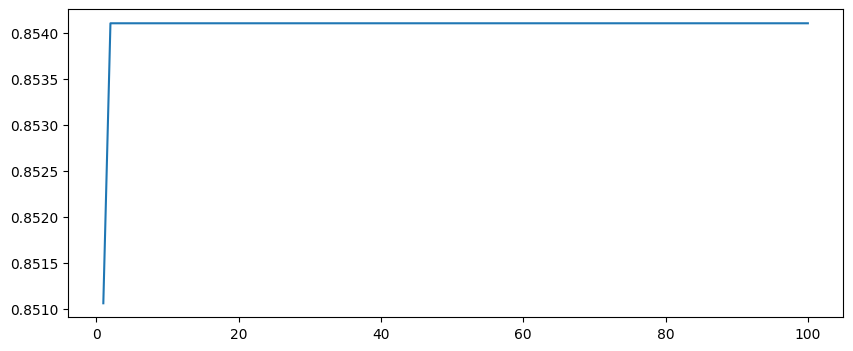

In [ ]:
# acc 값을 시각화
# 100이라는 반복 횟수 값을 x축
# acc - y축
# 선그래프
# 정확도 변동 추이 확인해보기

plt.figure(figsize = (10,4))

x = range(1,101)
y = h.history['accuracy']
plt.plot(x,y)

plt.show()

In [ ]:
# 4. 모델 평가
# evaluate(테스트 문제, 테스트 답)
# test 성능 확인하기
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8440


[0.433851420879364, 0.8439716100692749]

In [ ]:
# 예측
pre = model.predict(X_test)
# sigmoid : 0.5보다 작으면 0, 크면 1
pre # 모든 값을 0이라고 예측(값들이 전부 0.5보다 작기때문)

In [ ]:
# pre > 0.5
pre2 = pre > 0.5
pre2
# 혼동행렬표
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pre2)
cm
# 데이터 프레임 변환
cm_df = pd.DataFrame(cm, index = ['실제 0 ', '실제 1'], columns = ['예측 0', '예측 1'])
cm_df

,예측 0,예측 1
실제 0,119,0
실제 1,22,0
